# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [76]:
df = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/No supervisado/Reducción dimensionalidad/Practica/data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [10]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


<Axes: xlabel='Carb_g'>

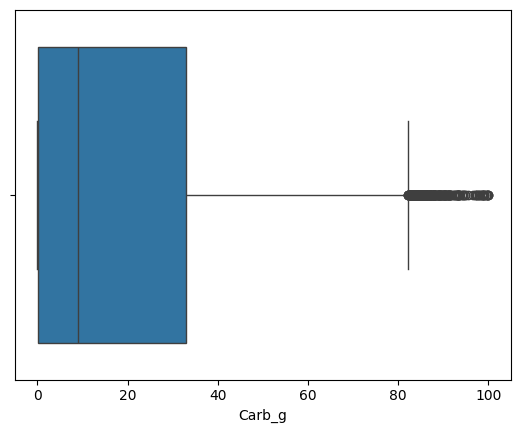

In [11]:
sns.boxplot(df, x="Carb_g")

<Axes: xlabel='Sugar_g'>

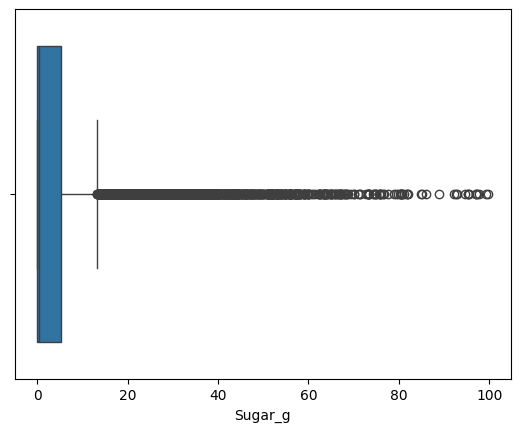

In [12]:
sns.boxplot(df, x="Sugar_g")

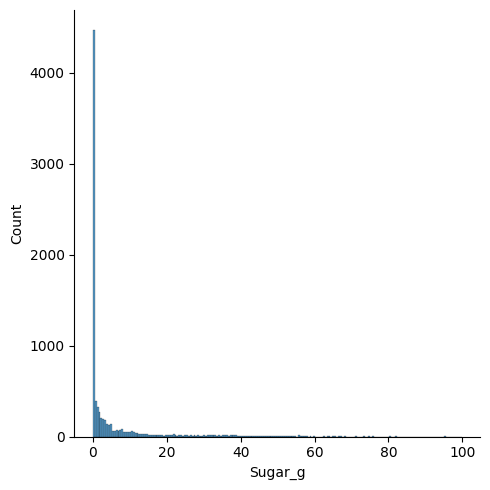

In [13]:
sns.displot(df, x="Sugar_g")

In [14]:
df_outliers = df[['Carb_g', 'Sugar_g']]
df_outliers

,Carb_g,Sugar_g
0,0.06,0.06
1,0.06,0.06
2,0.00,0.00
3,2.34,0.50
4,2.79,0.51
...,...,...
8613,0.00,0.00
8614,5.41,0.00
8615,73.14,73.20
8616,2.00,0.00


Eliminamos los valores anómalos de `Carb_g` y `Sugar_g`

In [66]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [68]:
df_cleaned = remove_outliers(df, 'Carb_g')
df_cleaned = remove_outliers(df_cleaned, 'Sugar_g') 
df_cleaned 

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
12,NaN,-1.200885,0.270754,-0.210782,-0.329297,0.135187,-2.350047,0.514944,-1.599422,-0.045939,...,-0.297525,-1.706106,0.365449,-0.829108,NaN,-1.780872,-1.009969,0.217976,0.247540,NaN
13,NaN,NaN,0.254371,NaN,-0.054036,0.021843,NaN,-0.426953,NaN,-0.130883,...,0.091719,-2.563940,0.486408,-1.052645,NaN,-0.340810,-0.792448,0.374973,0.315310,-2.380885
14,NaN,NaN,0.259641,-1.227540,-0.299904,0.321973,NaN,0.591447,-2.289573,-0.117612,...,0.163253,-3.142980,0.537814,-0.977786,NaN,-0.688091,-0.864594,0.310561,0.384808,-1.693733
16,NaN,0.456146,-0.150013,0.651694,-0.457979,0.249450,NaN,0.750333,NaN,-0.570842,...,-0.432618,-3.142980,0.513584,-1.419003,NaN,-0.688091,-0.909667,0.194107,-0.513623,-1.693733
18,NaN,0.348688,0.391086,0.559889,-0.452423,0.328834,NaN,0.657590,0.405478,0.468646,...,0.738972,-0.064043,0.744964,-1.001876,-3.132636,0.126571,-0.736445,0.498460,0.444103,0.462025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,0.696652,0.386587,NaN,NaN,0.616481,0.696663,NaN,-1.130334,NaN,NaN,...,NaN,NaN,NaN,-1.377433,NaN,NaN,-0.600649,NaN,NaN,NaN
8608,0.696964,0.479125,0.241444,-0.527360,0.621886,-0.655947,0.759739,NaN,NaN,NaN,...,-0.647001,-2.313726,0.348160,0.801863,0.497028,0.644213,0.576184,0.352146,0.071332,0.139375
8609,0.696970,0.465481,NaN,NaN,0.641491,0.212851,-0.035732,NaN,NaN,NaN,...,NaN,NaN,0.341997,-0.829108,NaN,0.059234,-1.051685,NaN,NaN,NaN
8610,0.696975,0.464467,NaN,NaN,0.639358,-0.429790,-0.111927,NaN,NaN,-3.356633,...,NaN,NaN,0.582712,-0.868406,NaN,NaN,-0.629984,0.747780,NaN,NaN


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

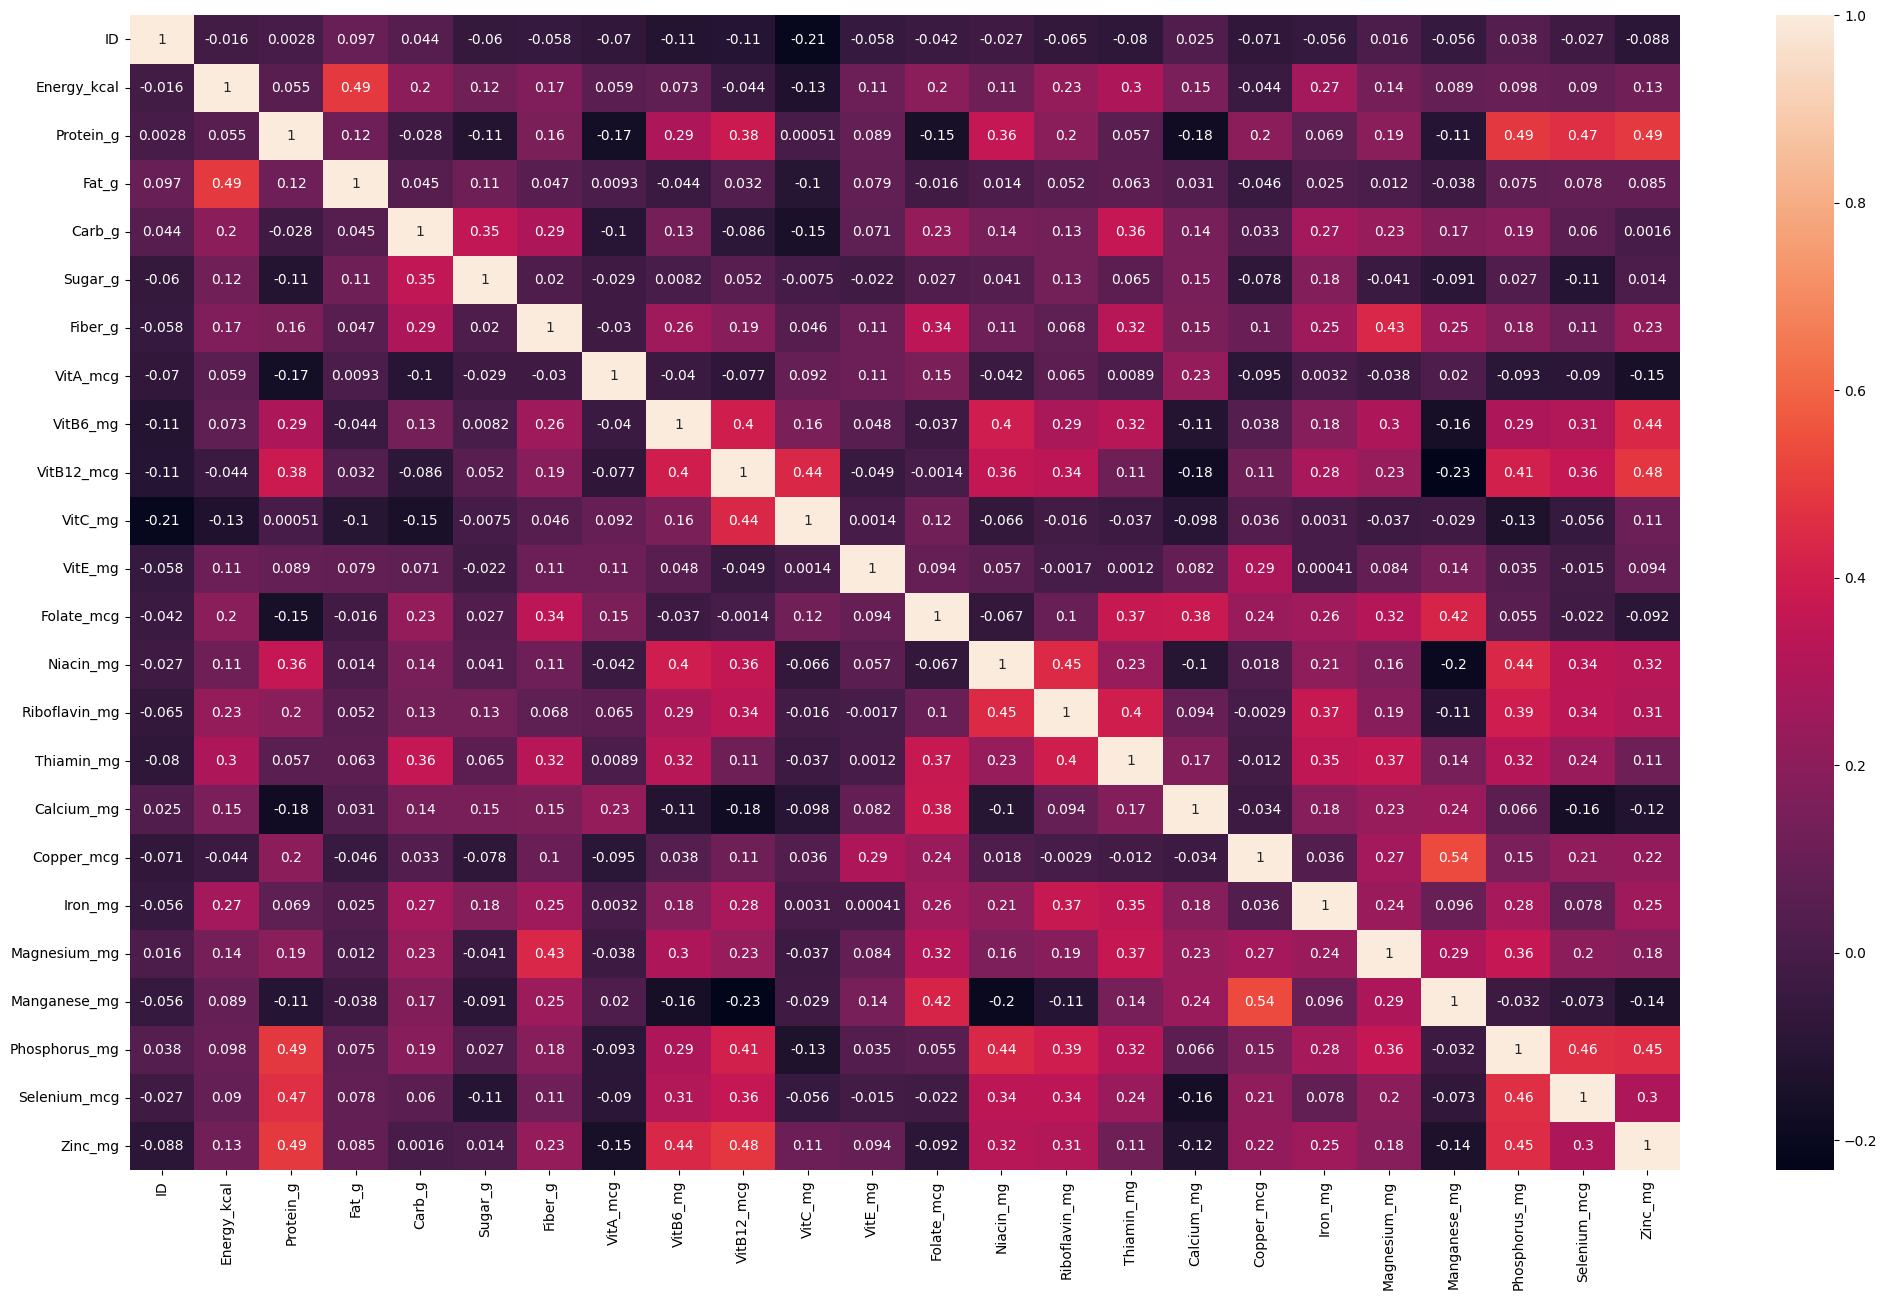

In [70]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [16]:
df.columns[df.columns.str.contains("USRDA")]  # CAMPOS QUE CONTIENEN LA PALABRA 'USRDA' 

Index(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

In [18]:
df.drop(columns=df.columns[df.columns.str.contains("USRDA")], inplace=True) # ELIMINA LOS CAMPOS QUE CONTIEN LA PALABRA 'USRDA' 
df.head() 

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Variables no numéricas
Elimina las variables de texto del dataset

In [90]:
# Filtrar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1.121057,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,...,0.007472,0.002622,0.025818,0.004158,0.019803,0.000000,0.004751,0.033711,0.018019,0.008149
1,1.121098,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,...,0.007472,0.002622,0.025818,0.004158,0.019803,0.000018,0.004751,0.032329,0.018019,0.004535
2,1.121140,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,...,0.000000,0.000187,0.003839,0.000833,0.003328,0.000001,0.000000,0.004277,0.000000,0.000909
3,1.121181,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,...,0.086178,0.061565,0.257619,0.023879,0.364643,0.000044,0.053315,0.440097,0.233994,0.216577
4,1.121221,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,...,0.048790,0.007348,0.239017,0.011599,0.445754,0.000027,0.055570,0.497306,0.233994,0.212175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,1.256148,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,...,0.036814,0.187516,0.136412,0.016529,0.053541,0.000111,0.133531,0.309583,0.847817,0.095310
8614,1.258041,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,...,0.048790,0.065085,0.018293,0.009950,0.008299,0.000037,0.084429,0.475346,0.332569,0.131825
8615,1.258102,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,...,0.000000,0.006231,0.045120,0.102857,0.010775,0.000022,0.023530,0.011364,0.012647,0.017125
8616,1.258122,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,...,0.014889,0.083881,0.088293,0.008299,0.008299,0.000444,0.467023,0.328275,0.404252,0.087011


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

<Axes: >

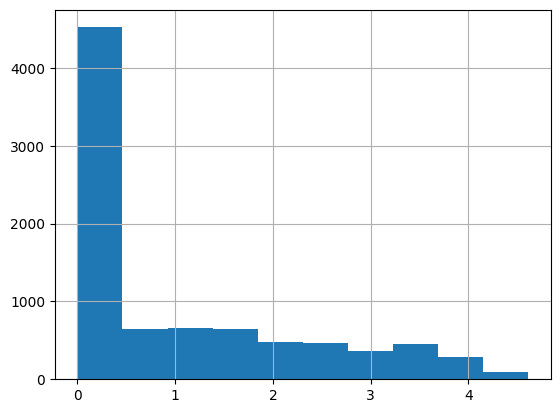

In [92]:
df['Sugar_g'].hist() 

In [94]:
from scipy import stats

print(stats.skew(df['Energy_kcal']))
print(stats.skew(df['Sugar_g'])) 

-1.2118203825254386
1.0034222288460226


In [95]:
for col in numeric_cols:
    df[col] = np.log1p(df[col])

<Axes: >

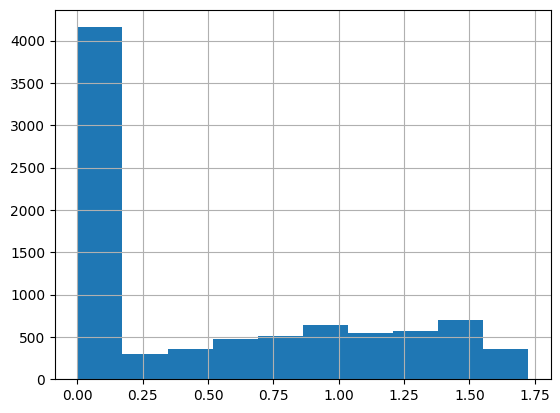

In [97]:
df['Sugar_g'].hist() 

In [98]:
stats.skew(df['Sugar_g']) 

0.5463180047733739

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [100]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(numeric_cols)  
df_scaled 

array([[-3.85499164,  1.54041394, -1.37969871, ..., -0.93528923,
        -0.72885913, -0.76704317],
       [-3.8531378 ,  1.54041394, -1.37969871, ..., -0.94379087,
        -0.72885913, -0.7872277 ],
       [-3.8512861 ,  1.74566103, -1.72821981, ..., -1.11633899,
        -0.81146808, -0.80748542],
       ...,
       [ 2.32642523,  0.5368946 , -1.96180649, ..., -1.07274606,
        -0.7534859 , -0.71689864],
       [ 2.32733785, -0.57899174,  0.72461786, ...,  0.87655799,
         1.04189618, -0.32651035],
       [ 2.36137314, -0.59032935,  0.90996043, ...,  0.26494633,
         0.41058235, -0.32651035]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [102]:
# Aplicar PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled) 
df_pca 

array([[-2.87747482e+00, -2.60712290e-02, -1.05778434e+00, ...,
        -1.90589827e-02, -3.10057176e-03,  2.66050918e-03],
       [-2.86091507e+00,  3.26945403e-02, -1.02379471e+00, ...,
        -1.69002004e-02, -2.63338005e-03,  2.29710571e-03],
       [-3.78842061e+00,  3.48529086e-02, -1.71430274e+00, ...,
        -1.49784843e-02, -7.56731613e-04,  1.97642242e-03],
       ...,
       [-3.53723911e+00,  1.44626359e+00,  1.72854829e-01, ...,
        -2.37000449e-03, -1.12670427e-02,  6.52610961e-03],
       [ 1.39154001e+00, -4.26899632e-01,  2.54123207e+00, ...,
        -3.52958650e-02,  9.50746892e-03, -7.55808504e-03],
       [ 2.60905003e-02, -1.42182605e+00,  5.33975449e-01, ...,
        -3.53984280e-02, -1.04916499e-02,  1.18725302e-02]])

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [103]:
# Calcular la varianza explicada y la varianza acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance) 
cumulative_variance 

array([0.3081029 , 0.44250193, 0.52096478, 0.58427744, 0.6388301 ,
       0.68271601, 0.72342282, 0.75325886, 0.78011207, 0.80399553,
       0.82475328, 0.84405658, 0.86190918, 0.87683559, 0.89067818,
       0.90382456, 0.91610959, 0.92731619, 0.93724943, 0.94579781,
       0.95335067, 0.96020741, 0.96662184, 0.9723296 , 0.97739303,
       0.98163281, 0.98551426, 0.98920182, 0.99158536, 0.99352554,
       0.99527665, 0.99697239, 0.99851033, 0.99932555, 0.99984632,
       0.99994907, 0.9999853 , 0.99999546, 1.        ])

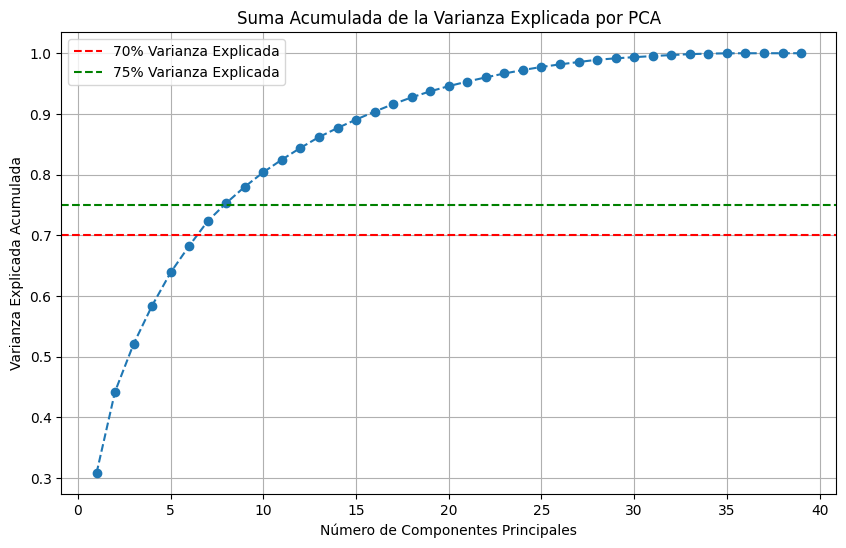

In [104]:
# Visualizar la varianza acumulada en un diagrama de líneas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Suma Acumulada de la Varianza Explicada por PCA')
plt.grid(True)
plt.axhline(y=0.70, color='r', linestyle='--', label='70% Varianza Explicada')
plt.axhline(y=0.75, color='g', linestyle='--', label='75% Varianza Explicada')
plt.legend()
plt.show() 

In [105]:
# Determinar el número de componentes para 70-75% de la varianza
num_components_70 = np.argmax(cumulative_variance >= 0.70) + 1
num_components_75 = np.argmax(cumulative_variance >= 0.75) + 1

print(f'Número de componentes para capturar al menos el 70% de la varianza: {num_components_70}')
print(f'Número de componentes para capturar al menos el 75% de la varianza: {num_components_75}') 

Número de componentes para capturar al menos el 70% de la varianza: 7
Número de componentes para capturar al menos el 75% de la varianza: 8


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos. 

In [106]:
# Para este ejemplo, seleccionamos el número de componentes que captura al menos el 75% de la varianza
num_components_selected = num_components_75 

In [107]:
# Aplicar PCA con el número de componentes seleccionados
pca_selected = PCA(n_components=num_components_selected)
df_pca_selected = pca_selected.fit_transform(df_scaled) 
df_pca_selected 

array([[-2.87747482, -0.02607123, -1.05778434, ..., -1.30630082,
         1.94273351,  1.60345833],
       [-2.86091507,  0.03269454, -1.02379471, ..., -1.25082059,
         1.96317221,  1.60311003],
       [-3.78842061,  0.03485291, -1.71430274, ..., -0.42592047,
         2.00131976,  1.38442699],
       ...,
       [-3.53723911,  1.44626359,  0.17285483, ...,  1.0551708 ,
         1.10813936, -0.78781549],
       [ 1.39154001, -0.42689963,  2.54123207, ...,  1.1320359 ,
        -2.36365239,  0.78425574],
       [ 0.0260905 , -1.42182605,  0.53397545, ..., -0.18266893,
         0.15423072,  0.54196254]])

In [108]:
# Convertir los resultados de PCA a un DataFrame
df_pca_selected = pd.DataFrame(df_pca_selected, columns=[f'PC{i+1}' for i in range(df_pca_selected.shape[1])]) 
df_pca_selected 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.877475,-0.026071,-1.057784,2.221602,4.374905,-1.306301,1.942734,1.603458
1,-2.860915,0.032695,-1.023795,2.216427,4.362860,-1.250821,1.963172,1.603110
2,-3.788421,0.034853,-1.714303,1.786794,5.269160,-0.425920,2.001320,1.384427
3,1.656433,-0.831718,0.589966,2.953439,1.122358,-4.236052,2.434850,-0.145154
4,1.409433,-0.671188,0.948468,3.490352,1.313130,-4.669716,3.009425,-0.574865
...,...,...,...,...,...,...,...,...
8613,3.214051,-3.743689,-0.137038,1.868873,1.813158,-0.346496,-0.358124,0.701218
8614,-0.010326,-2.505312,1.169061,0.801951,-1.340199,0.093528,-0.503666,0.384200
8615,-3.537239,1.446264,0.172855,-2.083784,-0.258081,1.055171,1.108139,-0.787815
8616,1.391540,-0.426900,2.541232,2.212818,1.230762,1.132036,-2.363652,0.784256


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [109]:
# Guardar la columna 'FoodGroup'
food_groups = df['FoodGroup']

In [114]:
# Añadir la columna 'FoodGroup' al DataFrame de PCA
df_pca_selected['FoodGroup'] = food_groups.values 

In [112]:
# Para cada componente principal, identificar los 3 grupos de comida con los valores más altos
top_food_groups = {}
for pc in df_pca_selected.columns[:-1]:  # Excluir la última columna que es 'FoodGroup'
    top_food_groups[pc] = df_pca_selected.groupby('FoodGroup')[pc].mean().nlargest(3).index.tolist()  
top_food_groups 

{'PC1': ['Breakfast Cereals', 'Nut and Seed Products', 'Spices and Herbs'],
 'PC2': ['Spices and Herbs', 'Breakfast Cereals', 'Nut and Seed Products'],
 'PC3': ['Nut and Seed Products',
  'Cereal Grains and Pasta',
  'Spices and Herbs'],
 'PC4': ['Spices and Herbs',
  'Dairy and Egg Products',
  'Finfish and Shellfish Products'],
 'PC5': ['Fats and Oils', 'Snacks', 'Nut and Seed Products'],
 'PC6': ['Nut and Seed Products', 'Cereal Grains and Pasta', 'Beverages'],
 'PC7': ['Dairy and Egg Products', 'Baked Products', 'Sweets'],
 'PC8': ['Cereal Grains and Pasta',
  'Poultry Products',
  'Finfish and Shellfish Products']}

In [113]:
# Mostrar los resultados
for pc, groups in top_food_groups.items():
    print(f"Para {pc}, los 3 grupos de comida con los valores más altos son: {groups}") 

Para PC1, los 3 grupos de comida con los valores más altos son: ['Breakfast Cereals', 'Nut and Seed Products', 'Spices and Herbs']
Para PC2, los 3 grupos de comida con los valores más altos son: ['Spices and Herbs', 'Breakfast Cereals', 'Nut and Seed Products']
Para PC3, los 3 grupos de comida con los valores más altos son: ['Nut and Seed Products', 'Cereal Grains and Pasta', 'Spices and Herbs']
Para PC4, los 3 grupos de comida con los valores más altos son: ['Spices and Herbs', 'Dairy and Egg Products', 'Finfish and Shellfish Products']
Para PC5, los 3 grupos de comida con los valores más altos son: ['Fats and Oils', 'Snacks', 'Nut and Seed Products']
Para PC6, los 3 grupos de comida con los valores más altos son: ['Nut and Seed Products', 'Cereal Grains and Pasta', 'Beverages']
Para PC7, los 3 grupos de comida con los valores más altos son: ['Dairy and Egg Products', 'Baked Products', 'Sweets']
Para PC8, los 3 grupos de comida con los valores más altos son: ['Cereal Grains and Pasta'